In [67]:
import os
os.chdir("C:\\Users\\Ali Ahmadi\\Desktop\\RNA Secondary Structure Prediction\\presentation\\appendix\\parts of speech")


from collections import defaultdict
import matplotlib.pyplot as plt
from grammar.pcfg import PCFG
import networkx as nx

### Save PCFG

In [68]:
def save_pcfg(pcfg, filename):
    unary_rules = pcfg.grammar.unary_rules
    binary_rules = pcfg.grammar.binary_rules
    
    with open(f"{filename}.pcfg", "w+") as pcfg_file:
        for A, B, C in binary_rules:
            pcfg_file.write(f"{A} -> {B} {C} {pcfg.q[(A, B, C)]}\n")
            
        for A, w in unary_rules:
            pcfg_file.write(f"{A} -> {w} {pcfg.q[(A, w)]}\n")

### Get CYK tree

In [69]:
def gen_parse_tree(tree, table, start, end, non_terminal = "S", firstRun = True, layer=1):
    if firstRun:
        tree.add_node((start, end, "S"), name="S",layer=layer)
        layer += 1

    for _start, _end, _non_terminal in table[(start, end, non_terminal)]:
        tree.add_node((_start, _end, _non_terminal), name=_non_terminal, layer=layer)
        new_layer = layer + 1
        tree.add_edge((_start, _end, _non_terminal), (start, end, non_terminal))
        gen_parse_tree(tree, table, _start, _end, _non_terminal, firstRun=False, layer=new_layer)

In [70]:
def draw_parse_tree(table, start_point, end_point):
    parse_tree = nx.Graph()
    gen_parse_tree(parse_tree, table, start_point, end_point)
    
    pos = nx.multipartite_layout(parse_tree, subset_key ="layer")
    
    mapping = defaultdict()
    for node in parse_tree.nodes:
        mapping[tuple(node)] = (tuple(node)[2])
        
    nx.draw(
        parse_tree, 
        pos, 
        labels=mapping,
        with_labels=True, 
        node_color='#d6c1e8', 
        node_size=500, 
        font_size=8,
        width=2
    )
    
    return parse_tree

### Save PCFG 

In [71]:
def save_pcfg(pcfg, filename):
    unary_rules = pcfg.grammar.unary_rules
    binary_rules = pcfg.grammar.binary_rules
    
    with open(f"{filename}.pcfg", "w+") as pcfg_file:
        for A, B, C in binary_rules:
            pcfg_file.write(f"{A} -> {B} {C} {pcfg.q[(A, B, C)]}\n")
            
        for A, w in unary_rules:
            pcfg_file.write(f"{A} -> {w} {pcfg.q[(A, w)]}\n")

### Estimate PCFG on sentences

In [72]:
pcfg = PCFG("grammar.cfg")
pcfg.estimate("sentences.train", 50)
save_pcfg(pcfg, "grammar")

pcfg = PCFG("grammar.cfg", "grammar.pcfg")

Itration number: 1
Itration number: 2
Itration number: 3
Itration number: 4
Itration number: 5
Itration number: 6
Itration number: 7
Itration number: 8
Itration number: 9
Itration number: 10
Itration number: 11
Itration number: 12
Itration number: 13
Itration number: 14
Itration number: 15
Itration number: 16
Itration number: 17
Itration number: 18
Itration number: 19
Itration number: 20
Itration number: 21
Itration number: 22
Itration number: 23
Itration number: 24
Itration number: 25
Itration number: 26
Itration number: 27
Itration number: 28
Itration number: 29
Itration number: 30
Itration number: 31
Itration number: 32
Itration number: 33
Itration number: 34
Itration number: 35
Itration number: 36
Itration number: 37
Itration number: 38
Itration number: 39
Itration number: 40
Itration number: 41
Itration number: 42
Itration number: 43
Itration number: 44
Itration number: 45
Itration number: 46
Itration number: 47
Itration number: 48
Itration number: 49
Itration number: 50
Estimatio

In [73]:
for _ in range(40):
    sentence = pcfg.gen_sentence("S")
    prob, table = pcfg.sentence_prob(sentence)
    print(sentence, prob)

a fork eat a fish 0.056249999999999994
a fork fish a fish 0.028124999999999994
they fish a fish 0.018749999999999996
they eat they with a fish 0.00375
they eat a fork 0.0375
they eat a fork with they 0.00375
a fish eat a fish 0.056249999999999994
a fork eat they with a fork 0.005625
a fish fish a fish with they 0.0028124999999999995
a fork fish a fork 0.028124999999999994
a fish eat a fork 0.056249999999999994
they eat a fork 0.0375
a fish fish they with a fish 0.0028124999999999995
a fork eat they with a fork with a fork 0.0008437500000000001
a fork eat a fork with a fork 0.0084375
a fish eat they with a fish 0.005625
a fork eat they 0.0375
a fork eat a fork 0.056249999999999994
they eat they 0.024999999999999998
they fish a fork with a fork 0.0028124999999999995
they eat they with a fish 0.00375
a fork fish they with a fish 0.0028124999999999995
a fork eat a fork 0.056249999999999994
they eat a fish 0.0375
a fish eat a fork with a fish 0.0084375
a fork eat a fish 0.056249999999999994

In [74]:
save_pcfg(pcfg, "grammar")

### Run CYK algorithm

In [75]:
# Run CYK algorithm
prob, table = pcfg.sentence_prob("a fork fish a fish with they")
print("Sentence Prob:", prob)

Sentence Prob: 0.0028124999999999995


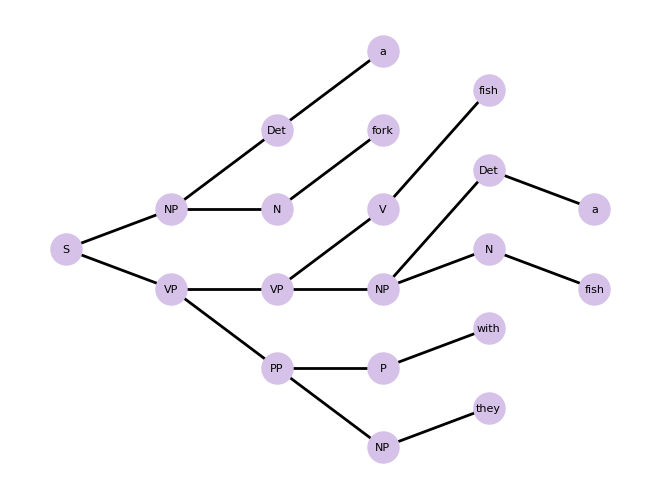

In [76]:
# Go throw parse table
draw_parse_tree(table, 1, 7)
plt.savefig("plot.png", dpi=1000)